In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [2]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 115us/sample - loss: 0.6936 - val_loss: 0.6935
Epoch 2/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6934 - val_loss: 0.6933
Epoch 3/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 4/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6931 - val_loss: 0.6929
Epoch 5/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6929 - val_loss: 0.6927
Epoch 6/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6927 - val_loss: 0.6926
Epoch 7/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.6925 - val_loss: 0.6924
Epoch 8/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6924 - val_loss: 0.6922
Epoch 9/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6922 - val

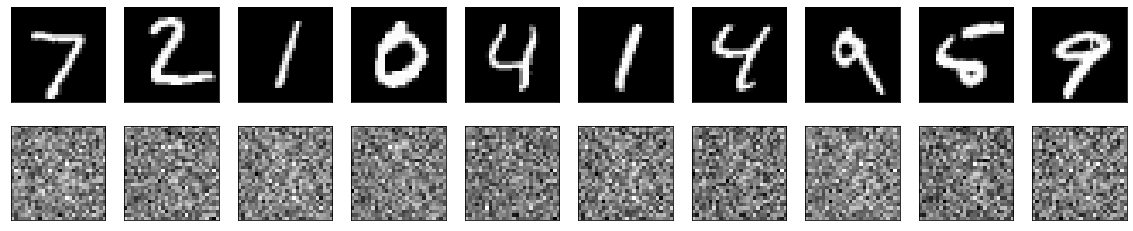

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()